In [235]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


In [236]:
tau = 0.25
mu1 = 0.5
mu2 = 3.5
sigma1 = 0.2
sigma2 = 0.7
n = 1000000


In [237]:
x_1 = np.random.normal(mu1, sigma1, int(tau*n)) 
x_2 = np.random.normal(mu2, sigma2, int((1-tau)*n)) 
x = np.r_[x_1, x_2]

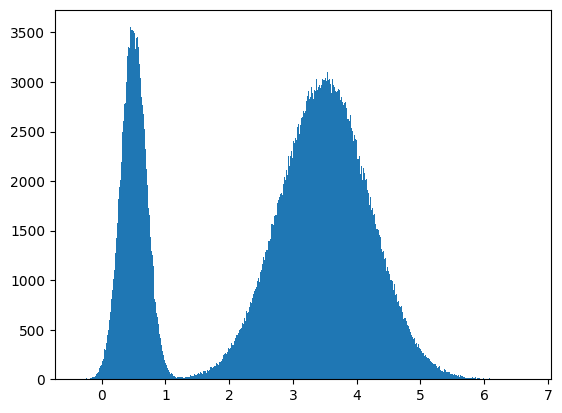

In [238]:
plt.hist(x, 1000)
plt.show()

In [239]:
norm = lambda x, mu, sigma: 1/np.sqrt(2*np.pi*sigma)*np.exp(-1*(x-mu)**2/(2*sigma)) 

In [240]:
def e(x, tau, mu1, mu2, sigma1, sigma2):
    T_1 = tau*norm(x, mu1, sigma1)
    T_2 = (1-tau)*norm(x, mu2, sigma2)
    
    T_norm = T_1 + T_2 

    t_1 = np.divide(T_1, T_norm, out=np.full_like(T_norm, 0.5), where=T_norm!=0)
    t_2 = np.divide(T_2, T_norm, out=np.full_like(T_norm, 0.5), where=T_norm!=0)

    return np.vstack((t_1, t_2))



In [241]:
def m(x, n, *args):
    t_1, t_2 = e(x, *args)

    tau = np.sum(t_1)/n
    
    mu1 = np.sum(t_1*x)/np.sum(t_1)
    mu2 = np.sum(t_2*x)/np.sum(t_2)

    sigma1 = np.sum(t_1*(x-mu1)**2)/np.sum(t_1)
    sigma2 = np.sum(t_2*(x-mu2)**2)/np.sum(t_2)
    return tau, mu1, mu2, sigma1, sigma2


In [242]:
def em_double_gauss(x, n, tau, mu1, mu2, sigma1, sigma2, rtoul = 1e-2, staps = 100):
    iter = 0
    par = (tau, mu1, mu2, sigma1, sigma2)
    while iter <= staps:
        par = m(x, n, *par)
        iter += 1
    return par


In [243]:
tau, mu1, mu2, sigma1, sigma2 = em_double_gauss(0, n, 0.5, np.mean(x)-np.std(x), np.mean(x)+np.std(x), np.std(x)**2, np.std(x)**2)


/tmp/ipykernel_5235/270114970.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  norm = lambda x, mu, sigma: 1/np.sqrt(2*np.pi*sigma)*np.exp(-1*(x-mu)**2/(2*sigma))
/tmp/ipykernel_5235/270114970.py:1: RuntimeWarning: invalid value encountered in scalar divide
  norm = lambda x, mu, sigma: 1/np.sqrt(2*np.pi*sigma)*np.exp(-1*(x-mu)**2/(2*sigma))


nan nan nan nan nan


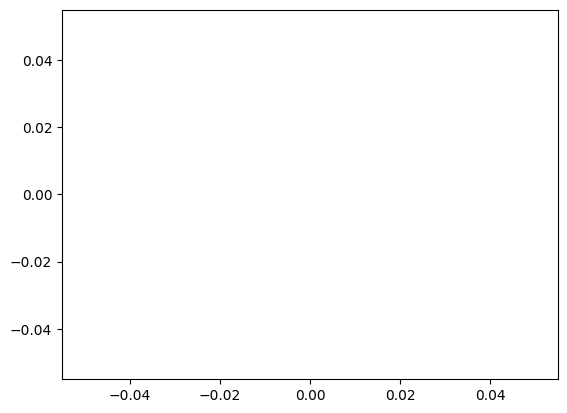

In [244]:
x = np.linspace(0, 8, 1000)
print(tau, mu1, mu2, sigma1, sigma2)
plt.plot(x, [tau*norm(i, mu1, sigma1)+ (1 - tau)*norm(i, mu2, sigma2) for i in x])
plt.show()